In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
from NetEmbs.DataProcessing.connect_db import *
from NetEmbs.DataProcessing.stats import getHistCounts
from NetEmbs.DataProcessing.prepare_data import prepare_data
from NetEmbs.Vis.plots import plotHist
from NetEmbs.Vis.helpers import set_font

In [3]:
sim_d = prepare_data(upload_data("Simulation/FSN_Data.db", None))
sim_d.head(2)

,ID,Signature,FA_Name,Debit,Credit,from
0,1,"([('TradePayables', 1.0)], [('FixedAssets', 0....",FixedAssets,0.991327,0.0,False
1,1,"([('TradePayables', 1.0)], [('FixedAssets', 0....",TradePayables,0.000000,1.0,True


In [23]:
import pandas as pd
def get_left_right(df):
    """
    Helper function for counting left-hand and right-hand account for BP
    :param df: grouped object
    :return: Series with number of FA on the left side and on the right side
    """
    return pd.Series({"Left": df[df["from"] == True].count()[0], "Right": df[df["from"] == False].count()[0]})

stat = sim_d.groupby("ID", as_index=False).apply(get_left_right)

In [5]:
stat_here = getHistCounts(sim_d)

In [48]:
def plotHist(df, title="Histogram", normalized=False):
    stat_here = getHistCounts(df)
    from matplotlib.ticker import MaxNLocator
    for k, d in stat_here.items():
        ax = plt.figure().gca()
        if normalized:
            import numpy as np
            ax.bar(d.keys(), list(d.values())/np.sum(list(d.values())))
        else:
            ax.bar(d.keys(), d.values())
        ax.set_xlim((0.5,10.5))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title(k + "-side number of FAs")
        if title is not None and isinstance(title, str):
            plt.tight_layout()
            plt.savefig("img/" + title + k, dpi=140, pad_inches=0.01)

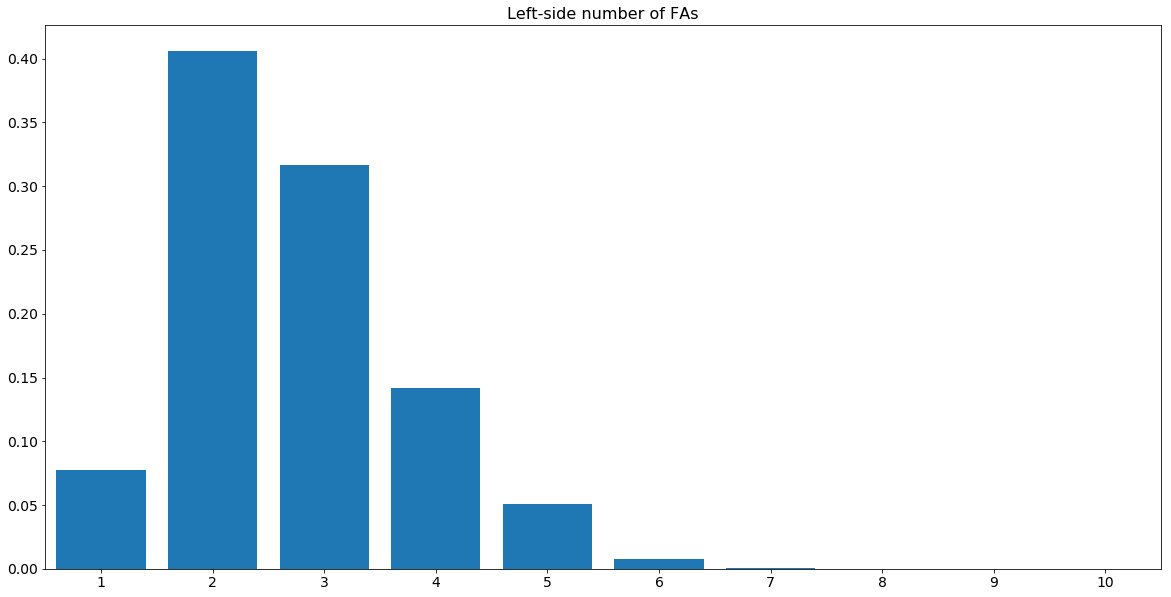

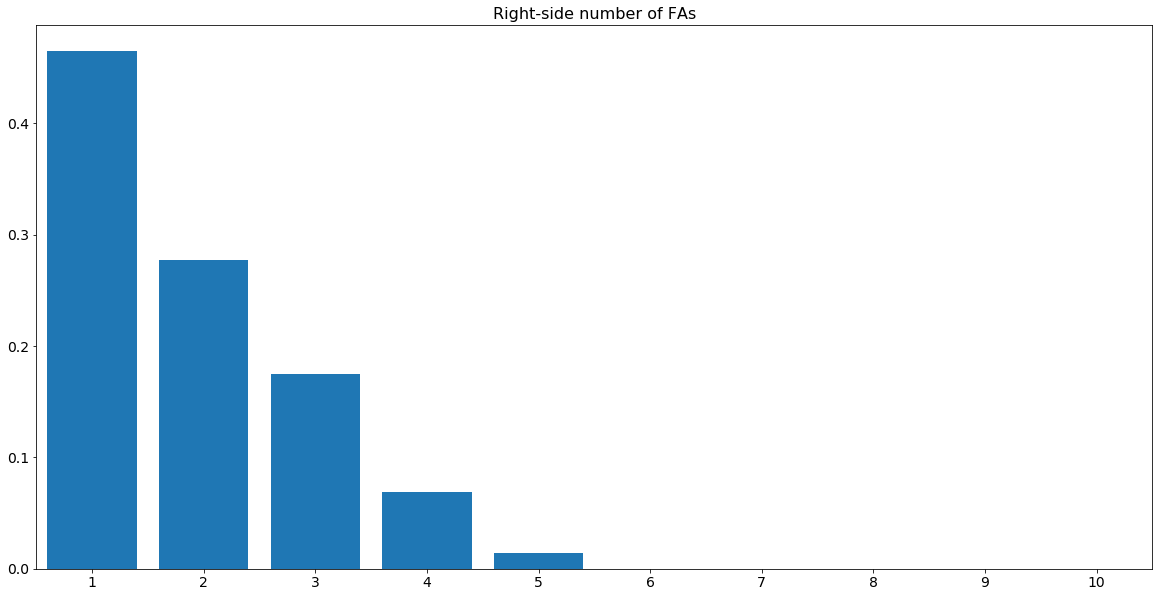

In [49]:
set_font(16)
plotHist(sim_d, None, True)